In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Importing Modules

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import seaborn as sns

## Exploratory Data Analysis

In [0]:
data = pd.read_csv('/content/drive/My Drive/NLP1/cybertruck1.csv')

In [5]:
data.head()

,id,tweet,label
0,1,Few cool renders is comming. :) \n\n#TeslaCybe...,cybertruck
1,2,#Cybertruck oder #polonez? ðŸ˜‰,cybertruck
2,3,"How to turn your $40,000 Cybertruck into a $40...",cybertruck
3,4,Gonna need that #Cybertruck armored glass to c...,cybertruck
4,5,J'aiBienPeurQueBientÃ´t \nToutesLesClassesDiri...,cybertruck


In [6]:
data.isnull().sum()

id       0
tweet    0
label    0
dtype: int64

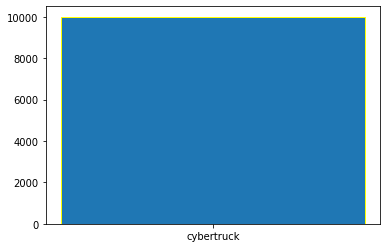

In [11]:
def plot_count():
  """
  This function will retun a bar plot for each candidates tweets count appear in the dataset
  """
  z = {'cybertruck': 'cybertruck'}
  
  # mapping authro short name to full name
  x = data.label.map(z).unique()
  
  # getting count for each author text appear in train dataset
  y = data.label.value_counts().values
  
  plt.bar(x,y, edgecolor='yellow')
  plt.show()
  
  
plot_count()

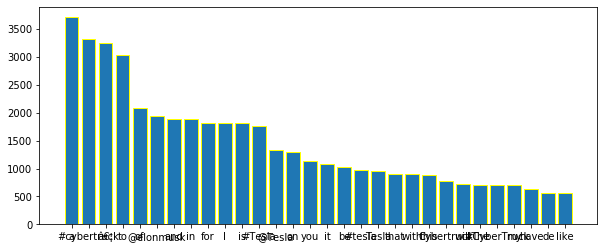

In [12]:
def plot_words_count():
  """
  This function will return a bar plot for first 30 words counts appears in dataset
  """
  # getting all words and their count of occurances
  words = data.tweet.str.split(expand=True).unstack().value_counts()
  
  # selecting 30 words
  x = words.index.values[2:32]
  y = words.values[2:32]
  
  # plotting barplot
  fig = plt.figure()
  fig.set_figwidth(10)
  plt.bar(x,y, edgecolor = 'yellow')
  
plot_words_count()

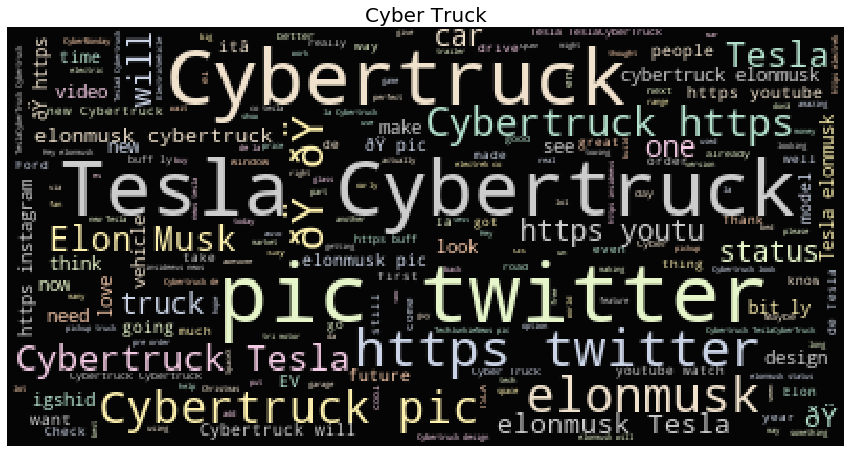

In [13]:
def word_cloud_viz():
  """
  This function will return word_cloud visualization of words for each candidate tweet
  """
  # python list that store text of three author
  ts = data[data.label=="cybertruck"]["tweet"].values

  # z = {'EAP': 'Edgar Allen Poe', 'MWS': 'Mary Shelley', 'HPL': 'HP Lovecraft'}


  
  
  # plotting Amy Klobuchar word_cloud
  plt.figure(figsize=(15, 10))
  wc = WordCloud(background_color="black", max_words=10000, stopwords=STOPWORDS, max_font_size=40)
  wc.generate(" ".join(ts))
  plt.title("Cyber Truck", fontsize=20)
  plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
  plt.axis('off')
  
  
word_cloud_viz()

## Sentiment Analysis

In [0]:
def sentiment(df_tweet_polarity_desc):
    if df_tweet_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_tweet_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val


def sentiment_analysis(label):
  tweets= data.loc[(data['label']== label), ['tweet']]
  bloblist_desc = list()
  df_tweet_str=tweets['tweet'].astype(str)
  for row in df_tweet_str:
      blob = TextBlob(row)
      bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
      df_tweet_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])

  df_tweet_polarity_desc['Sentiment_Type'] = df_tweet_polarity_desc.apply(sentiment, axis=1)

  plt.figure(figsize=(10,10))
  plt.title(label)
  sns.set_style("whitegrid")
  ax = sns.countplot(x="Sentiment_Type", data=df_tweet_polarity_desc)

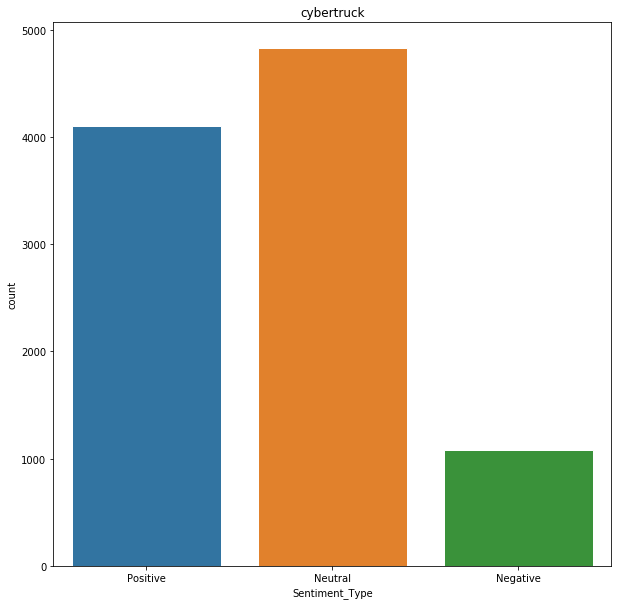

In [17]:
c1 = ["cybertruck"]
for cn in c1:
  sentiment_analysis(cn)